In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras.backend as K
import tensorflow as tf
from keras.datasets import mnist
from keras.layers import Input, Dense, Lambda, Dropout
from keras.models import Model
from sklearn.model_selection import train_test_split
from keras.losses import mean_absolute_error

In [2]:
(x_train_mnist, _), (x_test_mnist, y_test_mnist) = mnist.load_data()
x_train_mnist = x_train_mnist.astype('float32') / 255.
x_test_mnist = x_test_mnist.astype('float32') / 255.
x_train_mnist = x_train_mnist.reshape((len(x_train_mnist), np.prod(x_train_mnist.shape[1:])))
x_test_mnist = x_test_mnist.reshape((len(x_test_mnist), np.prod(x_test_mnist.shape[1:])))
print(x_train_mnist.shape)
print(x_test_mnist.shape)
print(y_test_mnist.shape)

(60000, 784)
(10000, 784)
(10000,)


In [3]:
encoding_dim = 32

input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)

encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics = ["accuracy"])

autoencoder.fit(x_train_mnist, x_train_mnist, epochs=5, batch_size=256, shuffle=True, validation_data=(x_test_mnist, x_test_mnist))

Epoch 1/5


2022-04-07 23:46:17.193320: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


235/235 [==============================] - 1s 4ms/step - loss: 0.2770 - accuracy: 0.0138 - val_loss: 0.1905 - val_accuracy: 0.0122
Epoch 2/5
235/235 [==============================] - 1s 3ms/step - loss: 0.1719 - accuracy: 0.0103 - val_loss: 0.1550 - val_accuracy: 0.0102
Epoch 3/5
235/235 [==============================] - 1s 3ms/step - loss: 0.1454 - accuracy: 0.0108 - val_loss: 0.1349 - val_accuracy: 0.0098
Epoch 4/5
235/235 [==============================] - 1s 3ms/step - loss: 0.1295 - accuracy: 0.0106 - val_loss: 0.1224 - val_accuracy: 0.0102
Epoch 5/5
235/235 [==============================] - 1s 3ms/step - loss: 0.1190 - accuracy: 0.0103 - val_loss: 0.1136 - val_accuracy: 0.0107


In [4]:
reconstruction = autoencoder.predict(x_test_mnist)
test_loss = mean_absolute_error(x_test_mnist, reconstruction)
index = np.argpartition(test_loss, -10)[-10:]
err = []
with tf.compat.v1.Session() as sess:
    err.append(test_loss.numpy()[index])

In [5]:
round(err[0][1],4)

0.122

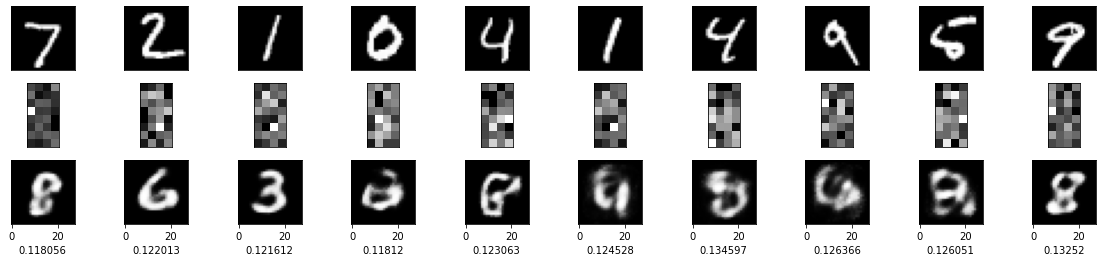

In [6]:
encoded_imgs = encoder.predict(x_test_mnist)
decoded_imgs = autoencoder.predict(x_test_mnist)
n = 10 
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_mnist[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(8, 4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs[index[i]].reshape(28, 28))
    plt.gray()
    rnd = round(err[0][i],6)
    ax.set_xlabel(rnd)
    ax.get_yaxis().set_visible(False)
plt.show()

<h4> Plotted the top 10 images with the most autoencoder errors. Except the 2nd and the 9th sample, all the other samples are reconstructed wrongly.

In [7]:
df = pd.read_csv("data1.csv")
df = df.dropna()

In [9]:
x = df.drop("Class", axis = 1)
y = df["Class"]

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)

<h4> 1-layer for encoder and decoder

In [11]:
encoding_dim = 2

input_img = Input(shape=(28,))
encoded = Dropout(0.01)(input_img) 
encoded = Dense(encoding_dim, activation='relu')(input_img)
encoded = Dropout(0.01)(encoded) 
decoded = Dense(28, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)

encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics = ["accuracy"])

history = autoencoder.fit(x_train, x_train, epochs=5, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/5
891/891 [==============================] - 1s 1ms/step - loss: 0.1615 - accuracy: 0.2148 - val_loss: -0.4305 - val_accuracy: 0.2449
Epoch 2/5
891/891 [==============================] - 1s 901us/step - loss: -1.1331 - accuracy: 0.2345 - val_loss: -2.0500 - val_accuracy: 0.2225
Epoch 3/5
891/891 [==============================] - 1s 879us/step - loss: -3.1384 - accuracy: 0.2160 - val_loss: -4.5186 - val_accuracy: 0.2019
Epoch 4/5
891/891 [==============================] - 1s 866us/step - loss: -6.0100 - accuracy: 0.1953 - val_loss: -7.9006 - val_accuracy: 0.1802
Epoch 5/5
891/891 [==============================] - 1s 854us/step - loss: -9.8301 - accuracy: 0.1787 - val_loss: -12.2118 - val_accuracy: 0.1757


(array([5.5686e+04, 1.0280e+03, 1.4800e+02, 4.1000e+01, 2.3000e+01,
        2.0000e+01, 1.2000e+01, 3.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0.27804077,  1.4205444 ,  2.563048  ,  3.7055514 ,  4.848055  ,
         5.9905586 ,  7.1330624 ,  8.275566  ,  9.418069  , 10.560573  ,
        11.703076  ], dtype=float32),
 <BarContainer object of 10 artists>)

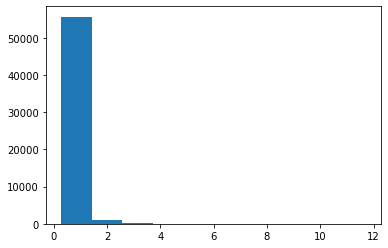

In [12]:
reconstruction = autoencoder.predict(x_test)
test_loss = mean_absolute_error(x_test, reconstruction)
with tf.compat.v1.Session() as sess:
    loss = test_loss.numpy()
plt.hist(loss, bins=10)

In [13]:
loss.shape

(56962,)

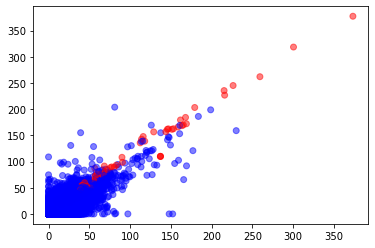

In [14]:
x_pred = encoder.predict(x_test)
x_pred = np.column_stack((x_pred, y_test))
x_pred = pd.DataFrame(x_pred)
plt.scatter(x_pred[0], x_pred[1], c = y_test, cmap='bwr', alpha=0.5)

In [15]:
df[df["Class"]==1]["V1"].count()

492

<h4> 3-layer for encoder and decoder

In [16]:
encoding_dim = 2

input_img = Input(shape=(28,))
encoded = Dense(15, activation='relu')(input_img)
encoded = Dense(7, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)
decoded = Dense(7, activation='relu')(encoded)
decoded = Dense(15, activation='relu')(decoded)
decoded = Dense(28, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)

encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics = ["accuracy"])

autoencoder.fit(x_train, x_train, epochs=5, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/5
891/891 [==============================] - 1s 1ms/step - loss: -60.0202 - accuracy: 0.0651 - val_loss: -341.0366 - val_accuracy: 0.0910
Epoch 2/5
891/891 [==============================] - 1s 1ms/step - loss: -2070.4768 - accuracy: 0.0980 - val_loss: -5262.5981 - val_accuracy: 0.1080
Epoch 3/5
891/891 [==============================] - 1s 1ms/step - loss: -12361.8516 - accuracy: 0.1174 - val_loss: -22219.4551 - val_accuracy: 0.1175
Epoch 4/5
891/891 [==============================] - 1s 1ms/step - loss: -38460.4219 - accuracy: 0.1268 - val_loss: -58765.2227 - val_accuracy: 0.1291
Epoch 5/5
891/891 [==============================] - 1s 995us/step - loss: -86802.6562 - accuracy: 0.1356 - val_loss: -120471.3125 - val_accuracy: 0.1355


(array([5.5656e+04, 1.0550e+03, 1.5100e+02, 4.1000e+01, 2.3000e+01,
        2.0000e+01, 1.2000e+01, 3.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0.27267882,  1.4157186 ,  2.5587583 ,  3.7017982 ,  4.8448377 ,
         5.9878774 ,  7.1309175 ,  8.273957  ,  9.416997  , 10.560037  ,
        11.703076  ], dtype=float32),
 <BarContainer object of 10 artists>)

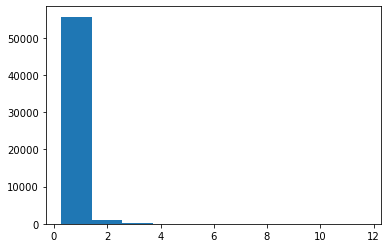

In [17]:
reconstruction = autoencoder.predict(x_test)
test_loss = mean_absolute_error(x_test, reconstruction)
with tf.compat.v1.Session() as sess:
    loss = test_loss.numpy()
plt.hist(loss, bins=10)

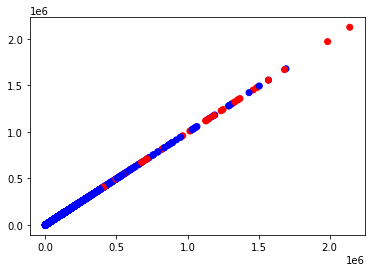

In [18]:
x_pred = encoder.predict(x_test)
x_pred = np.column_stack((x_pred, y_test))
x_pred = pd.DataFrame(x_pred)
plt.scatter(x_pred[0], x_pred[1], c = y_test, cmap='bwr')

<h4> Here, the histograms thus obtained are almost the same, but as seen in the scatter plots they have appreciable difference for both the models.

In [19]:
import tensorflow._api.v2.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [20]:
# m : batch size
m = 50   
# n_z : latent dimension
n_z = 2
# n_epoch : number of epoches for iterations
n_epoch = 10
epsilon_std=1.0
# intermediate_dim = 512
# Q(z|X) -- encoder
inputs = Input(shape=(784,))
h_q = Dense(512, activation='relu')(inputs)
mu = Dense(n_z, activation='linear')(h_q)
log_sigma = Dense(n_z, activation='linear')(h_q)

In [21]:
def sample_z(args):
    mu, log_sigma = args
    eps = K.random_normal(shape=(m, n_z), mean=0., stddev=epsilon_std)
    return mu + K.exp(log_sigma / 2) * eps

In [22]:
# Sample z ~ Q(z|X)
z = Lambda(sample_z)([mu, log_sigma])

In [23]:
# P(X|z) -- decoder
decoder_hidden = Dense(512, activation='relu')
decoder_out = Dense(784, activation='sigmoid')
h_p = decoder_hidden(z)
outputs = decoder_out(h_p)

In [24]:
# Overall VAE model, for reconstruction and training
vae = Model(inputs, outputs)
# Encoder model, to encode input into latent variable
# We use the mean as the output as it is the center point, the representative of the gaussian
encoder = Model(inputs, mu)
# Generator model, generate new data given latent variable z
d_in = Input(shape=(n_z,))
d_h = decoder_hidden(d_in)
d_out = decoder_out(d_h)
generator = Model(d_in, d_out)

In [25]:
def vae_loss(y_true, y_pred):
    """ Calculate loss = reconstruction loss + KL loss for each data in minibatch 
"""
    # E[log P(X|z)]
    recon = K.sum(K.binary_crossentropy(y_pred, y_true), axis=1)
    # D_KL(Q(z|X) || P(z|X)); calculate in closed form as both dist. are Gaussian
    kl = 0.5 * K.sum(K.exp(log_sigma) + K.square(mu) - 1. - log_sigma, axis=1)
    return recon + kl

In [26]:
vae.compile(optimizer='adam', loss=vae_loss)
vae.fit(x_train_mnist, x_train_mnist, batch_size=m, epochs=n_epoch)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 66us/sample - loss: 495.8422
Epoch 2/10
60000/60000 [==============================] - 4s 69us/sample - loss: 428.7962
Epoch 3/10
60000/60000 [==============================] - 4s 63us/sample - loss: 427.5788
Epoch 4/10
60000/60000 [==============================] - 4s 74us/sample - loss: 427.4316
Epoch 5/10
60000/60000 [==============================] - 4s 67us/sample - loss: 427.4232
Epoch 6/10
60000/60000 [==============================] - 4s 64us/sample - loss: 427.4208
Epoch 7/10
60000/60000 [==============================] - 4s 67us/sample - loss: 427.4195
Epoch 8/10
60000/60000 [==============================] - 4s 72us/sample - loss: 427.4187
Epoch 9/10
60000/60000 [==============================] - 5s 79us/sample - loss: 427.4181
Epoch 10/10
60000/60000 [==============================] - 4s 68us/sample - loss: 427.4178


/Users/gss/opt/miniconda3/lib/python3.9/site-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


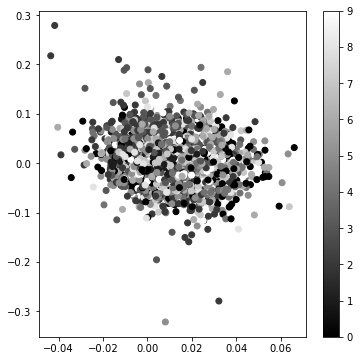

In [27]:
x_test_encoded = encoder.predict(x_test_mnist, batch_size=m)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test_mnist)
plt.colorbar()
plt.show()

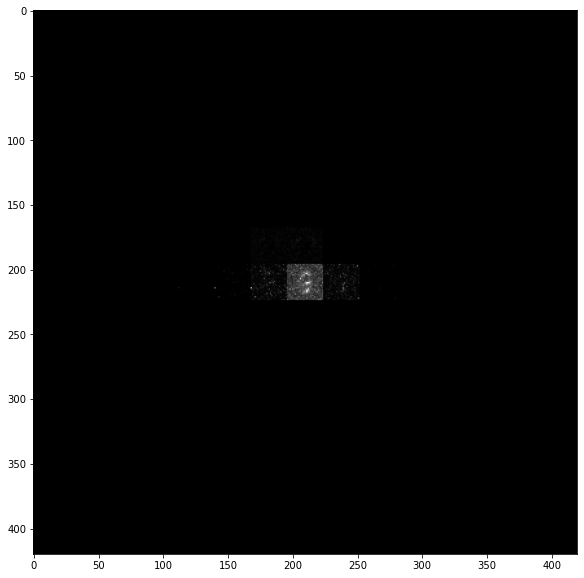

In [28]:
# display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# we will sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)
for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]]) * 2.0
        x_decoded = generator.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit
plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()

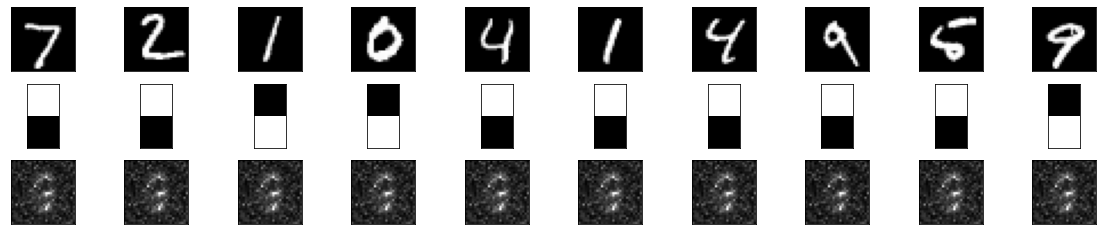

In [29]:
# latent representation
encoded_imgs = encoder.predict(x_test_mnist)
# Reconstructed image 
decoded_imgs = generator.predict(encoded_imgs)
n = 10 
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_mnist[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(2, 1))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs[index[i]].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

<h4> Now for 784->512->64->2

In [30]:
# m : batch size
m = 50   
# n_z : latent dimension
n_z = 2
# n_epoch : number of epoches for iterations
n_epoch = 10
epsilon_std=1.0
# intermediate_dim = 512
# Q(z|X) -- encoder
inputs = Input(shape=(784,))
h_q = Dense(512, activation='relu')(inputs)
h_q = Dense(64, activation='relu')(h_q)
mu = Dense(n_z, activation='linear')(h_q)
log_sigma = Dense(n_z, activation='linear')(h_q)

In [31]:
def sample_z(args):
    mu, log_sigma = args
    eps = K.random_normal(shape=(m, n_z), mean=0., stddev=epsilon_std)
    return mu + K.exp(log_sigma / 2) * eps

In [32]:
# Sample z ~ Q(z|X)
z = Lambda(sample_z)([mu, log_sigma])

In [33]:
# P(X|z) -- decoder
decoder_hidden = Dense(64, activation='relu')
decoder_hidden = Dense(512, activation='relu')
decoder_out = Dense(784, activation='sigmoid')
h_p = decoder_hidden(z)
outputs = decoder_out(h_p)

In [34]:
# Overall VAE model, for reconstruction and training
vae = Model(inputs, outputs)
# Encoder model, to encode input into latent variable
# We use the mean as the output as it is the center point, the representative of the gaussian
encoder = Model(inputs, mu)
# Generator model, generate new data given latent variable z
d_in = Input(shape=(n_z,))
d_h = decoder_hidden(d_in)
d_out = decoder_out(d_h)
generator = Model(d_in, d_out)

In [35]:
def vae_loss(y_true, y_pred):
    """ Calculate loss = reconstruction loss + KL loss for each data in minibatch 
"""
    # E[log P(X|z)]
    recon = K.sum(K.binary_crossentropy(y_pred, y_true), axis=1)
    # D_KL(Q(z|X) || P(z|X)); calculate in closed form as both dist. are Gaussian
    kl = 0.5 * K.sum(K.exp(log_sigma) + K.square(mu) - 1. - log_sigma, axis=1)
    return recon + kl

In [36]:
vae.compile(optimizer='adam', loss=vae_loss)
vae.fit(x_train_mnist, x_train_mnist, batch_size=m, epochs=n_epoch)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 72us/sample - loss: 478.0958
Epoch 2/10
60000/60000 [==============================] - 4s 68us/sample - loss: 428.8466
Epoch 3/10
60000/60000 [==============================] - 5s 75us/sample - loss: 427.4315
Epoch 4/10
60000/60000 [==============================] - 5s 86us/sample - loss: 427.4196
Epoch 5/10
60000/60000 [==============================] - 5s 76us/sample - loss: 427.4179
Epoch 6/10
60000/60000 [==============================] - 4s 74us/sample - loss: 427.4172
Epoch 7/10
60000/60000 [==============================] - 4s 72us/sample - loss: 427.4169
Epoch 8/10
60000/60000 [==============================] - 4s 73us/sample - loss: 427.4167
Epoch 9/10
60000/60000 [==============================] - 4s 74us/sample - loss: 427.4166
Epoch 10/10
60000/60000 [==============================] - 5s 75us/sample - loss: 427.4166


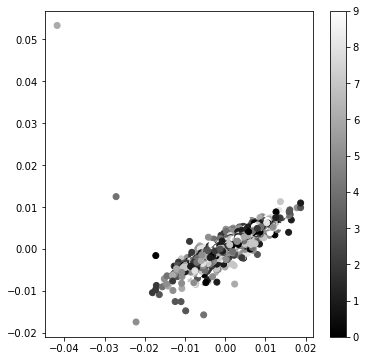

In [37]:
x_test_encoded = encoder.predict(x_test_mnist, batch_size=m)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test_mnist)
plt.colorbar()
plt.show()

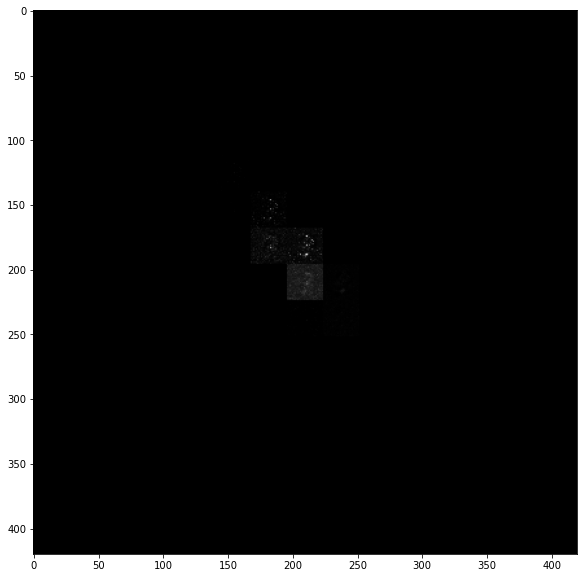

In [38]:
# display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# we will sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)
for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]]) * 2.0
        x_decoded = generator.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit
plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()

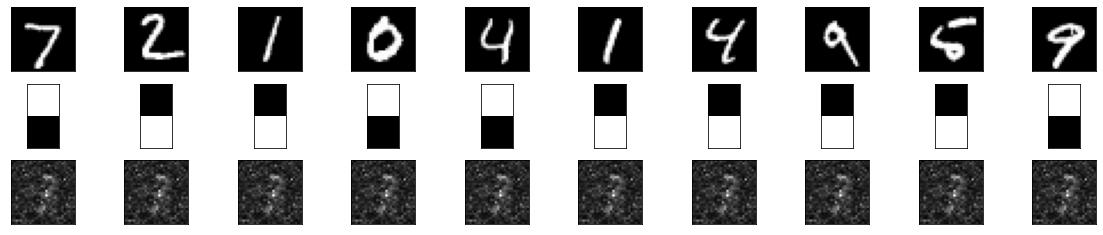

In [39]:
# latent representation
encoded_imgs = encoder.predict(x_test_mnist)
# Reconstructed image 
decoded_imgs = generator.predict(encoded_imgs)
n = 10 
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_mnist[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(2, 1))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs[index[i]].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()